## Declaração de biblioteca e outras configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

import csv

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Simulação dos dados

In [2]:
np.random.seed(0) #np.random.seed(3) #np.random.seed(25)
n_clusters = 4
exemplosTreino = 5

#Dados rotulados
#x,y = make_blobs(n_features=2, centers=n_clusters, n_samples=400)
x,y = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1,
                          n_classes=n_clusters, n_samples=1000)

#Definição de um conjunto de treinamento (pequeno) e outra parcela tratada como dados não rotulados
rotuladoPos = []; naoRotuladoPos = []; geralPos = []
for i in range(n_clusters):
    posClass = np.where(y == i)
    posRand = posClass[0][ np.argsort( np.random.uniform(0,1,len(posClass[0]))).tolist() ]
    
    for item in posRand[0:exemplosTreino]: rotuladoPos.append( item )
    for item in posRand[exemplosTreino:]: naoRotuladoPos.append( item )
    #for item in posRand: geralPos.append( item )

#Divisão dos dados (para fins de experimento)
xD = x[rotuladoPos,:]; yD = y[rotuladoPos]
xI = x[naoRotuladoPos,:]; yI = y[naoRotuladoPos]

## Visualização do conjunto simulado

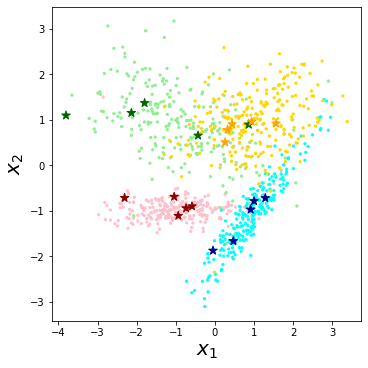

In [3]:
corI = ['pink','lightgreen','cyan','gold']; corD = ['darkred','darkgreen','darkblue','orange']
vecI = []; vecD = []
for i in yI: vecI.append(corI[i])
for i in yD: vecD.append(corD[i])

FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])
    
ax.scatter(xI[:,0],xI[:,1], marker='.', c=vecI, s=20)
ax.scatter(xD[:,0],xD[:,1], marker='*', c=vecD, s=80)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)

plt.show()

## Registro das informações em arquivos de texto

In [4]:
#Nome dos arquivos a serem salvos
path_data_Rotulado = 'simTreino.txt'
path_data_naoRotulado = 'simNaoRotulado.txt'


#Conjunto rotulado
f= open(path_data_Rotulado,"w")
for i in range(len(yD)):
    st = str(yD[i])
    for j in range(0,xD.shape[1]): #xD.shape = ('num. simula.','dim. espaço')
        st += ','+ str(xD[i,j])
    st += '\n' #depois que forma linha, 'pula para próxima linha'
    f.write(st)
f.close()


#Conjunto não rotulado (de avaliação)
f= open(path_data_naoRotulado,"w")
for i in range(len(yI)):
    st = str(yI[i])
    for j in range(0,xI.shape[1]): #xD.shape = ('num. simula.','dim. espaço')
        st += ','+ str(xI[i,j])
    st += '\n' #depois que forma linha, 'pula para próxima linha'
    f.write(st)
f.close()